In [1]:
# python libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import liana as li
import decoupler as dc

import session_info

# for run R code in jupyter notebook
import os
os.environ['R_HOME'] = "C:/Users/heung/anaconda3/Lib/R"

# to use R in jupyter notebook
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

cffi mode is CFFI_MODE.ANY
R home found: C:/Users/heung/anaconda3/Lib/R
Default options to initialize R: rpy2, --quiet, --no-save
C:\Users\heung\AppData\Local\Temp\ipykernel_60716\2127491082.py:32: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
c:\Users\heung\anaconda3\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.


In [2]:
adata = sc.read("adata_concat.h5ad")

In [ ]:
from scipy import io
io.mmwrite("../matrix", adata.X.T)

In [ ]:
with open("../barcodes.tsv", 'w') as f:
    for item in adata.obs_names:
        f.write(item + '\n')

In [ ]:
with open("../features.tsv", 'w') as f:
    for item in adata.var_names:
        f.write(item + '\n')

In [ ]:
adata.obs.to_csv('../r/metadata.csv')

# DEG analysis

In [3]:
adata.obs

,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,total_counts_ribo,...,MT_outlier,scDblFinder_score,scDblFinder_class,batch,leiden_res0_25,leiden_res0_5,leiden_res1,leiden_res2,cell_type,condition
AAACCTGAGAAACCGC-1-normal_1,1839,1838,7.516977,6291.0,8.747034,24.765538,117.0,4.770685,1.859800,2799.0,...,False,0.000065,singlet,normal_1,1,0,5,4,CD4 T cells,normal
AAACCTGAGGACCACA-1-normal_1,1980,1978,7.590347,6907.0,8.840435,25.727523,186.0,5.231109,2.692920,3114.0,...,False,0.000020,singlet,normal_1,5,6,7,6,CD8 T cells,normal
AAACCTGAGGATCGCA-1-normal_1,3024,3024,8.014666,9196.0,9.126633,16.746411,362.0,5.894403,3.936494,1643.0,...,False,0.058833,singlet,normal_1,6,8,9,16,CD16 Monocytes,normal
AAACCTGAGGCACATG-1-normal_1,1764,1764,7.475906,6365.0,8.758727,27.541241,96.0,4.574711,1.508248,2874.0,...,False,0.000126,singlet,normal_1,1,0,5,4,CD4 T cells,normal
AAACCTGAGGTGCACA-1-normal_1,2055,2055,7.628518,6529.0,8.784163,22.346454,211.0,5.356586,3.231735,2472.0,...,False,0.000733,singlet,normal_1,5,6,7,6,CD8 T cells,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCATGCTCC-1-hiv_3,1255,1255,7.135687,2367.0,7.769801,21.419518,53.0,3.988984,2.239121,405.0,...,False,0.000924,singlet,hiv_3,1,0,0,7,CD4 T cells,hiv
TTTGTCATCCAAATGC-1-hiv_3,1960,1959,7.580700,4776.0,8.471568,16.729481,144.0,4.976734,3.015075,840.0,...,False,0.000645,singlet,hiv_3,6,8,9,13,CD16 Monocytes,hiv
TTTGTCATCCAGGGCT-1-hiv_3,1115,1114,7.016610,2084.0,7.642524,22.120921,46.0,3.850147,2.207294,325.0,...,False,0.001734,singlet,hiv_3,2,2,2,3,NK cells,hiv
TTTGTCATCGTACGGC-1-hiv_3,1321,1321,7.186901,2621.0,7.871693,19.954216,75.0,4.330733,2.861503,578.0,...,False,0.072768,singlet,hiv_3,1,0,0,8,CD4 T cells,hiv


In [4]:
adata.obs["sample"] = (
    adata.obs["condition"].astype("str") + "_" + adata.obs["cell_type"].astype("str")
)

... storing 'sample' as categorical


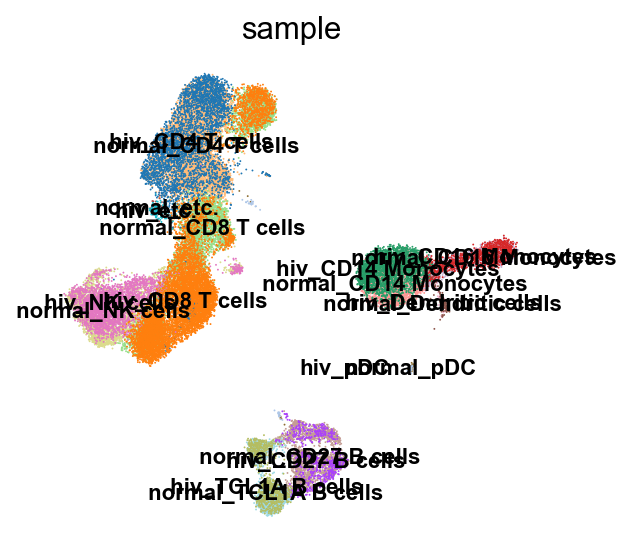

In [6]:
sc.pl.umap(
    adata,
    color = "sample",
    legend_loc = "on data",
    legend_fontsize = 10,
    title = "sample"
)

In [19]:
sc.tl.rank_genes_groups(adata, "sample", group = ["normal_Dendritic cells"], reference = "hiv_Dendritic cells", method = "wilcoxon")

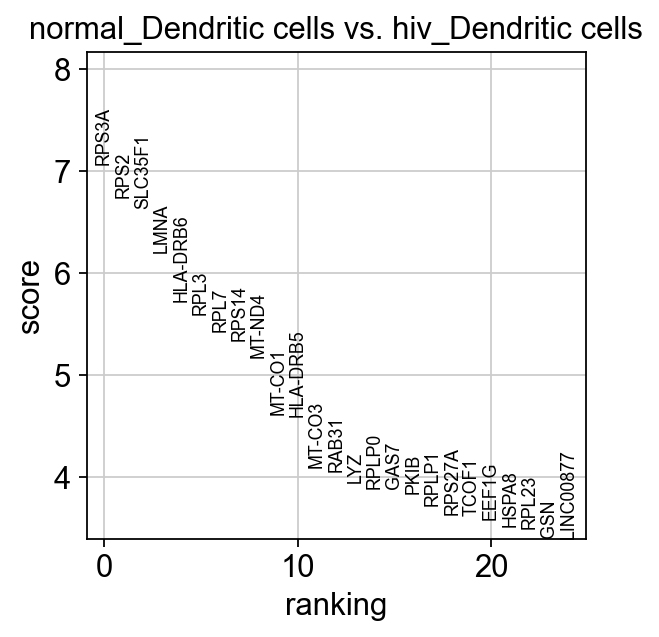

In [23]:
sc.pl.rank_genes_groups(adata, groups = ["normal_Dendritic cells"], n_genes = 25)

In [11]:
adata

AnnData object with n_obs × n_vars = 41828 × 849
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_MALAT1', 'log1p_total_counts_MALAT1', 'pct_counts_MALAT1', 'outlier', 'MT_outlier', 'scDblFinder_score', 'scDblFinder_class', 'batch', 'leiden_res0_25', 'leiden_res0_5', 'leiden_res1', 'leiden_res2', 'cell_type', 'condition', 'sample'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'ribo', 'MALAT1', 'highly_variable', 'n_cells-hiv_1', 'n_cells_by_counts-hiv_1', 'mean_counts-hiv_1', 'log1p_mean_counts-hiv_1', 'pct_dropout_by_counts-hiv_1', 'total_counts-hiv_1', 'log1p_total_counts-hiv_1', 'means-hiv_1', 'dispersions-hiv_1', 'dispersions_norm-hiv_1', 'n_cells-hiv_2', 'n_cells_by_counts-hiv_2', 'mean_counts-hiv_2', 'log1p_mean_counts-hiv_2', 'pct_dropout_by_coun